# K-Nearest Neighbour
- K-Nearest Neighbour Alogrithm can be used for both regression and calssification but mostly used for classification problem
- KNN is non parametric alogrithm ,which means it does not not make any assumption on underlying data
- KNN is a lazy alogrithm ,which means it does not do any computation,ie because it take time to caluclate the distance between the neighour points

# Working 
-basically it add a point based on the feature of the nearest point ,ie it first calculates the distance between the neighouring points and then the point which are nearest and also the that belong to to te category that is most is selected .for eg if 3 blue points are nearest and 2 red points then it take the feature blue.the number of points that must be selected is based on k


# Calculating distance 
-two ways 

-Manhattan=mode(x2-x1)+mode(y2-y1)
-Euclidean=sqrt((x2-1)^2 + (y2-y1)^2)

# k 
k is a hyperparameter ,k-value vary based on the data.we need to do tunning inorder to calculate the value of k
-ideally it is taken as 5

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [21]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head(4)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0


In [22]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

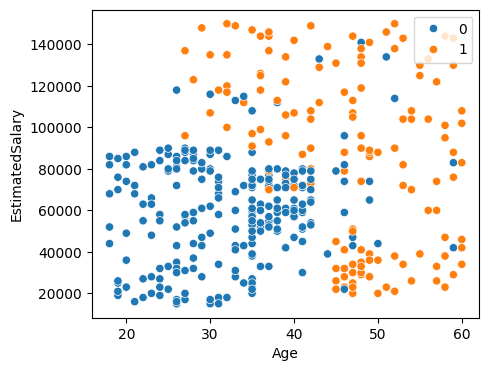

In [23]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.legend(loc=1)
plt.show()

In [24]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [25]:
# Scaling is required
from sklearn.preprocessing import StandardScaler

In [35]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
# here the output is in clasify form that is why we used Classifier 
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# here we can choose the neighbour based on the dataset and also can choose method of finding the distance whether Eculidean or Manhattan by p=1 or 2 default is eculidean
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
# Check whether the model is overfitting or not by finding the score between the test and train .
# Note always the train score must be high as comapred to test
knn.score(x_test,y_test)*100,knn.score(x_train,y_train)*100

(91.25, 92.5)

In [38]:
knn.predict([[1.083596,-0.990844]]) #1.083596	-0.990844 1

C:\Users\celia\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
# since there is overfitting we have find the best n_neighhour value by loop
for i in range(1,30):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_test,y_test)*100,knn1.score(x_train,y_train)*100)

    # 3 is better 


1 85.0 99.6875
2 86.25 91.5625
3 91.25 92.5
4 92.5 91.875
5 92.5 90.9375
6 90.0 90.9375
7 93.75 91.875
8 92.5 90.625
9 93.75 91.25
10 92.5 90.625
11 92.5 90.9375
12 92.5 91.25
13 92.5 91.5625
14 92.5 90.625
15 92.5 90.625
16 92.5 90.0
17 92.5 90.625
18 92.5 90.0
19 92.5 90.9375
20 93.75 90.0
21 92.5 90.3125
22 93.75 90.0
23 93.75 90.3125
24 93.75 89.375
25 93.75 90.0
26 93.75 89.375
27 92.5 89.375
28 93.75 88.75
29 93.75 88.75


C:\Users\celia\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


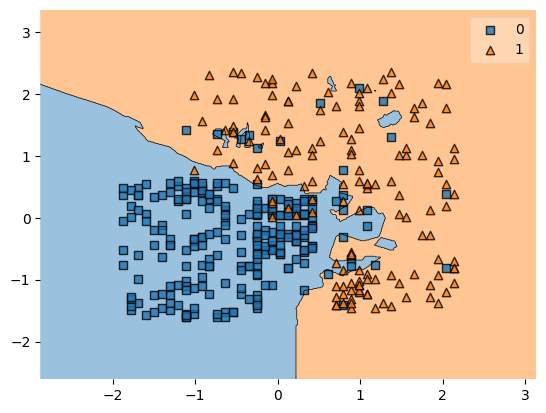

In [43]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()